## Implementation of $e^{i\theta SWAP_{12}}$

In [1]:
# Matrix Visualization Utilities for Complex Matrices
# ====================================================
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Circle
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_complex_matrix(M, normalize_cols=True, tol=1e-10, 
                        title="Complex Matrix", style="phase_mag"):
    """
    Visualize complex matrix with phase as color and magnitude as brightness.
    
    Parameters:
    -----------
    M : array-like
        Complex matrix to visualize
    normalize_cols : bool
        If True, normalize columns to unit norm
    tol : float
        Threshold for near-zero values (will be masked)
    title : str
        Plot title
    style : str
        'phase_mag' - phase as hue, magnitude as brightness (recommended)
        'phase_alpha' - phase as hue, magnitude as alpha
    """
    M = np.asarray(M, dtype=complex)
    
    if normalize_cols:
        norms = np.linalg.norm(M, axis=0, keepdims=True)
        norms[norms == 0] = 1.0
        M = M / norms
    
    # Compute phase (angle) and magnitude
    magnitude = np.abs(M)
    phase = np.angle(M)  # returns values in [-π, π]
    
    # Mask near-zero entries
    mask = magnitude < tol
    
    if style == "phase_mag":
        # Create RGB array: phase -> hue, magnitude -> value in HSV
        # Map phase from [-π, π] to [0, 1]
        hue = (phase + np.pi) / (2 * np.pi)
        
        # Create HSV then convert to RGB
        hsv = np.zeros((*M.shape, 3))
        hsv[:, :, 0] = hue  # Hue from phase
        hsv[:, :, 1] = 1.0  # Full saturation
        hsv[:, :, 2] = magnitude / magnitude.max() if magnitude.max() > 0 else 1.0  # Value from magnitude
        
        # Convert HSV to RGB
        rgb = mcolors.hsv_to_rgb(hsv)
        
        # Apply mask
        rgb[mask] = [0.95, 0.95, 0.95]  # Light gray for zeros
        
        fig, ax = plt.subplots(figsize=(8, 7))
        ax.imshow(rgb, aspect='equal', interpolation='nearest')
        
        # Add gridlines
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_xticks(np.arange(M.shape[1]) - 0.5, minor=True)
        ax.set_yticks(np.arange(M.shape[0]) - 0.5, minor=True)
        ax.grid(which='minor', color='white', linestyle='-', linewidth=1.5)
        ax.tick_params(which='minor', size=0)
        
    elif style == "phase_alpha":
        # Alternative: use alpha for magnitude
        hue = (phase + np.pi) / (2 * np.pi)
        norm_magnitude = magnitude / magnitude.max() if magnitude.max() > 0 else magnitude
        
        fig, ax = plt.subplots(figsize=(8, 7))
        
        # Create color array
        rgba = np.zeros((*M.shape, 4))
        for i in range(M.shape[0]):
            for j in range(M.shape[1]):
                if not mask[i, j]:
                    color = plt.cm.hsv(hue[i, j])
                    rgba[i, j] = [color[0], color[1], color[2], norm_magnitude[i, j]]
                else:
                    rgba[i, j] = [0.95, 0.95, 0.95, 1.0]
        
        ax.imshow(rgba, aspect='equal', interpolation='nearest')
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_yticks(np.arange(M.shape[0]))
    
    ax.set_xlabel("Column", fontsize=11)
    ax.set_ylabel("Row", fontsize=11)
    ax.set_title(title, fontsize=13, pad=15)
    
    # Add colorbar for phase
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = plt.colorbar(
        plt.cm.ScalarMappable(cmap='hsv', norm=mcolors.Normalize(vmin=-np.pi, vmax=np.pi)),
        cax=cbar_ax
    )
    cbar.set_label('Phase (radians)', fontsize=10)
    cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
    cbar.set_ticklabels(['-π', '-π/2', '0', 'π/2', 'π'])
    
    plt.tight_layout()
    return fig, ax


# ============================================================================
# Option 2: PennyLane-Style Visualization (Clean Quantum Computing Aesthetic)
# ============================================================================

def plot_complex_matrix_pennylane_style(M, normalize_cols=True, tol=1e-10, 
                                        title="Unitary Matrix"):
    """
    PennyLane-inspired visualization with clean aesthetics.
    Uses circular markers with phase as color and magnitude as size.
    """
    M = np.asarray(M, dtype=complex)
    
    if normalize_cols:
        norms = np.linalg.norm(M, axis=0, keepdims=True)
        norms[norms == 0] = 1.0
        M = M / norms
    
    magnitude = np.abs(M)
    phase = np.angle(M)
    
    # PennyLane color palette (professional quantum computing colors)
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(9, 8), facecolor='white')
    ax.set_facecolor('#f8f9fa')
    
    # Create circular markers
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            mag = magnitude[i, j]
            if mag > tol:
                # Map phase to color
                hue = (phase[i, j] + np.pi) / (2 * np.pi)
                color = plt.cm.hsv(hue)
                
                # Draw circle with size proportional to magnitude
                circle = Circle((j, M.shape[0] - 1 - i), 
                              radius=0.45 * mag / magnitude.max(),
                              facecolor=color, 
                              edgecolor='white',
                              linewidth=2,
                              alpha=0.9)
                ax.add_patch(circle)
    
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.set_aspect('equal')
    
    # Clean grid
    ax.set_xticks(range(M.shape[1]))
    ax.set_yticks(range(M.shape[0]))
    ax.set_yticklabels(range(M.shape[0])[::-1])
    ax.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
    
    ax.set_xlabel("Column", fontsize=12, fontweight='medium')
    ax.set_ylabel("Row", fontsize=12, fontweight='medium')
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    
    # Phase reference circle (legend)
    legend_ax = fig.add_axes([0.85, 0.15, 0.12, 0.12])
    legend_ax.set_xlim(-1.2, 1.2)
    legend_ax.set_ylim(-1.2, 1.2)
    legend_ax.set_aspect('equal')
    legend_ax.axis('off')
    
    # Draw phase wheel
    theta = np.linspace(0, 2*np.pi, 100)
    for i in range(len(theta)-1):
        color = plt.cm.hsv((theta[i] + np.pi) / (2*np.pi))
        legend_ax.plot([0.8*np.cos(theta[i]), 0.8*np.cos(theta[i+1])],
                      [0.8*np.sin(theta[i]), 0.8*np.sin(theta[i+1])],
                      color=color, linewidth=8)
    
    legend_ax.text(0, -1.5, 'Phase', ha='center', fontsize=9, fontweight='medium')
    legend_ax.text(1.0, 0, '0', ha='left', fontsize=8)
    legend_ax.text(0, 1.0, 'π/2', ha='center', fontsize=8)
    legend_ax.text(-1.0, 0, '±π', ha='right', fontsize=8)
    legend_ax.text(0, -1.0, '-π/2', ha='center', fontsize=8)
    
    plt.tight_layout()
    return fig, ax


# ============================================================================
# Option 3: Interactive Plotly Visualization (Hover for Exact Values)
# ============================================================================

def plot_complex_matrix_interactive(M, normalize_cols=True, tol=1e-10,
                                   title="Complex Matrix"):
    """
    Interactive plotly visualization with hover tooltips showing exact values.
    """
    M = np.asarray(M, dtype=complex)
    
    if normalize_cols:
        norms = np.linalg.norm(M, axis=0, keepdims=True)
        norms[norms == 0] = 1.0
        M = M / norms
    
    magnitude = np.abs(M)
    phase = np.angle(M)
    
    # Create RGB from phase
    hue = (phase + np.pi) / (2 * np.pi)
    hsv = np.zeros((*M.shape, 3))
    hsv[:, :, 0] = hue
    hsv[:, :, 1] = 1.0
    hsv[:, :, 2] = magnitude / magnitude.max() if magnitude.max() > 0 else 1.0
    rgb = mcolors.hsv_to_rgb(hsv)
    
    # Convert to format plotly expects
    rgb_uint = (rgb * 255).astype(int)
    
    # Create hover text
    hover_text = []
    for i in range(M.shape[0]):
        row = []
        for j in range(M.shape[1]):
            real = M[i, j].real
            imag = M[i, j].imag
            mag = magnitude[i, j]
            ph = phase[i, j]
            text = f"({i},{j})<br>" \
                   f"Value: {real:.4f} + {imag:.4f}i<br>" \
                   f"Magnitude: {mag:.4f}<br>" \
                   f"Phase: {ph:.4f} rad ({np.degrees(ph):.1f}°)"
            row.append(text)
        hover_text.append(row)
    
    fig = go.Figure(data=go.Heatmap(
        z=magnitude,
        text=hover_text,
        hovertemplate='%{text}<extra></extra>',
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Magnitude", thickness=15, len=0.7)
    ))
    
    # Update layout for clean appearance
    fig.update_layout(
        title=dict(text=title, x=0.5, xanchor='center', font=dict(size=16)),
        xaxis=dict(title="Column", side='bottom'),
        yaxis=dict(title="Row", autorange='reversed'),
        width=700,
        height=650,
        plot_bgcolor='white',
    )
    
    return fig


# ============================================================================
# Option 4: Combined Phase+Magnitude with Annotations
# ============================================================================

def plot_complex_matrix_annotated(M, normalize_cols=True, tol=1e-10,
                                 title="Complex Matrix", show_values=True):
    """
    Heatmap with phase colors and optional text annotations.
    Good for smaller matrices where you want to see exact values.
    """
    M = np.asarray(M, dtype=complex)
    
    if normalize_cols:
        norms = np.linalg.norm(M, axis=0, keepdims=True)
        norms[norms == 0] = 1.0
        M = M / norms
    
    magnitude = np.abs(M)
    phase = np.angle(M)
    
    # Create RGB from phase and magnitude
    hue = (phase + np.pi) / (2 * np.pi)
    hsv = np.zeros((*M.shape, 3))
    hsv[:, :, 0] = hue
    hsv[:, :, 1] = 1.0
    hsv[:, :, 2] = magnitude / magnitude.max() if magnitude.max() > 0 else 1.0
    rgb = mcolors.hsv_to_rgb(hsv)
    
    mask = magnitude < tol
    rgb[mask] = [0.95, 0.95, 0.95]
    
    fig, ax = plt.subplots(figsize=(max(M.shape[1], 8), max(M.shape[0], 7)))
    ax.imshow(rgb, aspect='equal', interpolation='nearest')
    
    # Add text annotations
    if show_values and M.shape[0] <= 8 and M.shape[1] <= 8:
        for i in range(M.shape[0]):
            for j in range(M.shape[1]):
                if not mask[i, j]:
                    # Choose text color based on brightness
                    brightness = hsv[i, j, 2]
                    text_color = 'white' if brightness < 0.5 else 'black'
                    
                    text = f"{magnitude[i,j]:.2f}\n∠{np.degrees(phase[i,j]):.0f}°"
                    ax.text(j, i, text, ha='center', va='center',
                           color=text_color, fontsize=8, fontweight='medium')
    
    # Clean grid
    ax.set_xticks(np.arange(M.shape[1]))
    ax.set_yticks(np.arange(M.shape[0]))
    ax.set_xticks(np.arange(M.shape[1]) - 0.5, minor=True)
    ax.set_yticks(np.arange(M.shape[0]) - 0.5, minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)
    ax.tick_params(which='minor', size=0)
    
    ax.set_xlabel("Column", fontsize=11)
    ax.set_ylabel("Row", fontsize=11)
    ax.set_title(title, fontsize=13, pad=15, fontweight='bold')
    
    plt.tight_layout()
    return fig, ax


# ======

In [163]:
# Utilities for constructing and analyzing PennyLane circuits
import pennylane as qml
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- pretty circuit drawings (Qiskit-like) ----------
def show_circuit(circ_fn, n, theta=None, max_length=10, title=None):
    """
    Render a nice circuit diagram with qml.draw_mpl.
    Returns a matplotlib Figure (so you can .savefig if you want).
    """
    dev = qml.device("default.qubit", wires=n, shots=None)

    @qml.qnode(dev)
    def _qnode():
        circ_fn(theta) if theta is not None else circ_fn()
        return qml.state()

    # Matplotlib drawer (visually similar to Qiskit)
    fig = qml.draw_mpl(_qnode, style="pennylane_sketch", max_length=max_length)()
    fig[0][1].set_title(title if title else f"Circuit Diagram (n={n}, θ={np.round(theta, 2)})", fontsize=14, pad=15)
    return fig

# ---------- basis helpers ----------
def _bits_of(n, state):
    s = np.binary_repr(state, width=n)
    return np.array([int(c) for c in s], dtype=int)

def _basis_state(n, state):
    return _bits_of(n, state)

# ---------- verify action on computational basis ----------
def print_action(circ_fn, n, theta=None, tol=1e-10):
    """
    For each |i>, print nonzero output amplitudes after applying circ_fn.
    """
    dev = qml.device("default.qubit", wires=n, shots=None)

    @qml.qnode(dev)
    def _qnode(state_int):
        qml.BasisState(_basis_state(n, state_int), wires=range(n))
        circ_fn(theta) if theta is not None else circ_fn()
        return qml.state()

    for i in range(2**n):
        amp = _qnode(i)
        nz = np.where(np.abs(amp) > tol)[0]
        bin_i = "".join(map(str, _bits_of(n, i)))
        print(f"State |{bin_i}> maps to:")
        for j in nz:
            bin_j = "".join(map(str, _bits_of(n, j)))
            print(f"  |{bin_j}> with amplitude {amp[j]}")
        if len(nz) == 0:
            print("  (all zero)")

def unitary_of(circ_fn, n, theta=None):
    """
    Build the full 2^n × 2^n unitary by acting on each basis vector.
    Column j is the output state from input |j>.
    """
    dev = qml.device("default.qubit", wires=n, shots=None)

    @qml.qnode(dev)
    def _qnode(state_int):
        qml.BasisState(_basis_state(n, state_int), wires=range(n))
        circ_fn(theta) if theta is not None else circ_fn()
        return qml.state()

    dim = 2**n
    U = np.zeros((dim, dim), dtype=complex)
    for j in range(dim):
        psi_out = _qnode(j)
        U[:, j] = psi_out
    return U


def _apply_multi_cnot(controls, target):
    """Controlled X with 1+ controls → target."""
    controls = list(controls)
    if len(controls) == 1:
        qml.CNOT(wires=[controls[0], target])
    elif len(controls) == 2:
        qml.Toffoli(wires=[controls[0], controls[1], target])
    else:
        qml.MultiControlledX(wires=controls + [target])

def _apply_ctrl_rx_theta(controls, target, theta):
    """Implements your U_wiggle(θ) = e^{i -θ/2 X} = RX(-2θ), with multiple controls."""
    ctrl = list(controls) if isinstance(controls, (list, tuple)) else [controls]
    qml.ctrl(qml.RX, control=ctrl)(theta, wires=target, id=np.round(theta, 2))

def _put_x(wires):
    """Apply X on (possibly many) wires."""
    if isinstance(wires, (list, tuple)):
        for w in wires:
            qml.PauliX(wires=w)
    else:
        qml.PauliX(wires=wires)

def print_action(circ_fn, n, theta=None):
    """For each |i>, print the nonzero outputs and amplitudes after applying circ_fn."""
    dev = qml.device("default.qubit", wires=n, shots=None)

    @qml.qnode(dev)
    def _qnode(state_int):
        qml.BasisState(_basis_state(n, state_int), wires=range(n))
        circ_fn(theta) if theta is not None else circ_fn()
        return qml.state()

    for i in range(2**n):
        amp = _qnode(i)
        nonzero = np.where(np.abs(amp) > 1e-10)[0]
        bin_i = "".join(map(str, _bits_of(n, i)))
        print(f"State |{bin_i}> maps to:")
        for j in nonzero:
            bin_j = "".join(map(str, _bits_of(n, j)))
            print(f"  |{bin_j}> with amplitude {amp[j]}")
        if len(nonzero) == 0:
            print("  (all zero)")


def plot_complex_heatmaps(M, normalize_cols=True, tol=1e-10, 
                          title="Real vs Imaginary Parts"):
    """
    Plot two heatmaps (side-by-side) for the real and imaginary components of M.
      - Column normalization (L2) can be enabled with normalize_cols.
      - Zeros (|entry| < tol) are masked (not plotted).
      - Real heatmap: RdBu (red = positive real, blue = negative real).
      - Imag heatmap: RdBu_r (blue = positive imag, red = negative imag).
    """
    M = np.asarray(M, dtype=complex)

    # Optional column-wise L2 normalization on the complex matrix
    if normalize_cols:
        norms = np.linalg.norm(M, axis=0, keepdims=True)  # uses |.| on complex entries
        norms[norms == 0] = 1.0
        M = M / norms

    Re = M.real
    Im = M.imag

    # Masks: don't plot near-zeros
    mask_re = np.abs(Re) < tol
    mask_im = np.abs(Im) < tol

    # Symmetric color limits per panel (so color intensity encodes signed magnitude)
    vmax_re = np.max(np.abs(Re[~mask_re])) if np.any(~mask_re) else 1.0
    vmax_im = np.max(np.abs(Im[~mask_im])) if np.any(~mask_im) else 1.0

    fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

    # Real part: red = positive real, blue = negative real
    sns.heatmap(
        Re, ax=axes[0], mask=mask_re, cmap="RdBu", center=0.0,
        vmin=-vmax_re, vmax=vmax_re, cbar=True, square=True,
        linewidths=0.1, linecolor="gray"
    )
    axes[0].set_title("Real(M)  (red=+real, blue=−real)")
    axes[0].set_xlabel("Columns")
    axes[0].set_ylabel("Rows")

    # Imag part: blue = positive imag (use reversed colormap)
    sns.heatmap(
        Im, ax=axes[1], mask=mask_im, cmap="RdBu_r", center=0.0,
        vmin=-vmax_im, vmax=vmax_im, cbar=True, square=True,
        linewidths=0.1, linecolor="gray"
    )
    axes[1].set_title("Imag(M)  (blue=+imag, red=−imag)")
    axes[1].set_xlabel("Columns")
    axes[1].set_ylabel("Rows")

    fig.suptitle(title, y=1.02, fontsize=12)
    return fig, axes



# ---------- e_SWAP_SWAP* blocks (4-qubit) ----------
# We stick to 0-based wires (Yao code uses 1-based). So:
# 1→0, 2→1, 3→2, 4→3

def e_SWAP_SWAP_circuit_1(theta):
    _apply_multi_cnot([0], 1)                # control(4, 1, 2=>X) → CNOT 0→1
    _put_x(1)                                # put(4, 2=>X)
    _apply_multi_cnot([1,2], 3)              # control(4, (2,3), 4=>X) → controls 1,2 → target 3
    _apply_ctrl_rx_theta([1,3], 2, theta) # control(4, (2,4), 3=>U_wiggle(θ))
    _apply_multi_cnot([1,2], 3)
    _put_x(1)
    _apply_multi_cnot([0], 1)

def e_SWAP_SWAP_circuit_2(theta):
    _put_x([0,2,3])
    _apply_multi_cnot([0,2,3], 1)
    _put_x([0,1])
    _apply_ctrl_rx_theta([1,2,3], 0, theta)
    _put_x([0,1])
    _apply_multi_cnot([0,2,3], 1)
    _put_x([0,2,3])

def e_SWAP_SWAP_circuit_3(theta):
    _put_x([0,2])
    _apply_multi_cnot([0,2,3], 1)
    _put_x([0,1])
    _apply_multi_cnot([1,2,3], 0)
    _apply_multi_cnot([0,1,2], 3)
    _put_x([2,3])
    _apply_ctrl_rx_theta([0,1,3], 2, theta)
    _put_x([2,3])
    _apply_multi_cnot([0,1,2], 3)
    _apply_multi_cnot([1,2,3], 0)
    _put_x([0,1])
    _apply_multi_cnot([0,2,3], 1)
    _put_x([0,2])

def e_SWAP_SWAP_circuit_4(theta):
    _put_x([0,3])
    _apply_multi_cnot([0,3,2], 1)
    _put_x([0,1])
    _apply_multi_cnot([1,3,2], 0)
    _put_x(3)
    _apply_multi_cnot([0,1,2], 3)
    _apply_ctrl_rx_theta([0,1,3], 2, theta)
    _apply_multi_cnot([0,1,2], 3)
    _put_x(3)
    _apply_multi_cnot([1,3,2], 0)
    _put_x([0,1])
    _apply_multi_cnot([0,3,2], 1)
    _put_x([0,3])

def e_SWAP_SWAP_circuit_5(theta):
    _apply_multi_cnot([1,2,3], 0)
    _apply_ctrl_rx_theta([0,2,3], 1, theta)
    # _apply_ctrl_rx_theta([0], 1, theta)
    _apply_multi_cnot([1,2,3], 0)


== 2-qubit action at θ=π ==
State |00> maps to:
  |00> with amplitude (1+0j)
State |01> maps to:
  |01> with amplitude (-1+0j)
State |10> maps to:
  |10> with amplitude (-1+0j)
State |11> maps to:
  |11> with amplitude (1+0j)


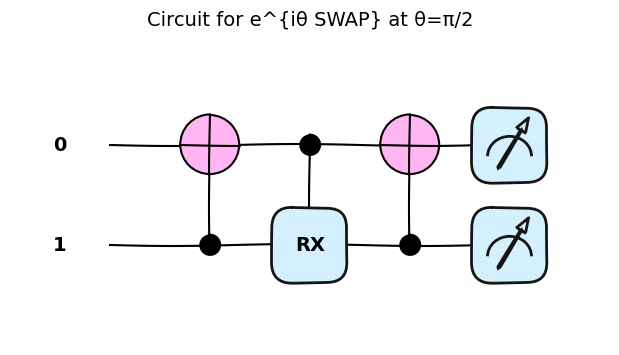

In [164]:
def circuit_2q(theta):
    _apply_multi_cnot([1], 0)
    _apply_ctrl_rx_theta([0], 1, -2*theta)
    _apply_multi_cnot([1], 0)

print("== 2-qubit action at θ=π ==")
print_action(lambda th: circuit_2q(th), n=2, theta=np.pi)
fig2 = show_circuit(lambda th: circuit_2q(th), n=2, theta=np.pi/2, title="Circuit for e^{iθ SWAP} at θ=π/2")

SWAP12 = unitary_of(lambda th: circuit_2q(th), n=2, theta=np.pi/2)
plot_complex_matrix_interactive(SWAP12, title="Unitary of e^{iθ SWAP} at θ=π/2")

## Implementation of $e^{i \theta SWAP_{12} \otimes SWAP_{34}}$


== 4-qubit action at θ=π ==
State |0000> maps to:
  |0000> with amplitude (1+0j)
State |0001> maps to:
  |0001> with amplitude (0.7071067811865476+0j)
  |0010> with amplitude 0.7071067811865475j
State |0010> maps to:
  |0001> with amplitude 0.7071067811865475j
  |0010> with amplitude (0.7071067811865476+0j)
State |0011> maps to:
  |0011> with amplitude (1+0j)
State |0100> maps to:
  |0100> with amplitude (0.7071067811865476+0j)
  |1000> with amplitude 0.7071067811865475j
State |0101> maps to:
  |0101> with amplitude (0.7071067811865476+0j)
  |1010> with amplitude 0.7071067811865475j
State |0110> maps to:
  |0110> with amplitude (0.7071067811865476+0j)
  |1001> with amplitude 0.7071067811865475j
State |0111> maps to:
  |0111> with amplitude (0.7071067811865476+0j)
  |1011> with amplitude 0.7071067811865475j
State |1000> maps to:
  |0100> with amplitude 0.7071067811865475j
  |1000> with amplitude (0.7071067811865476+0j)
State |1001> maps to:
  |0110> with amplitude 0.7071067811865475j
 

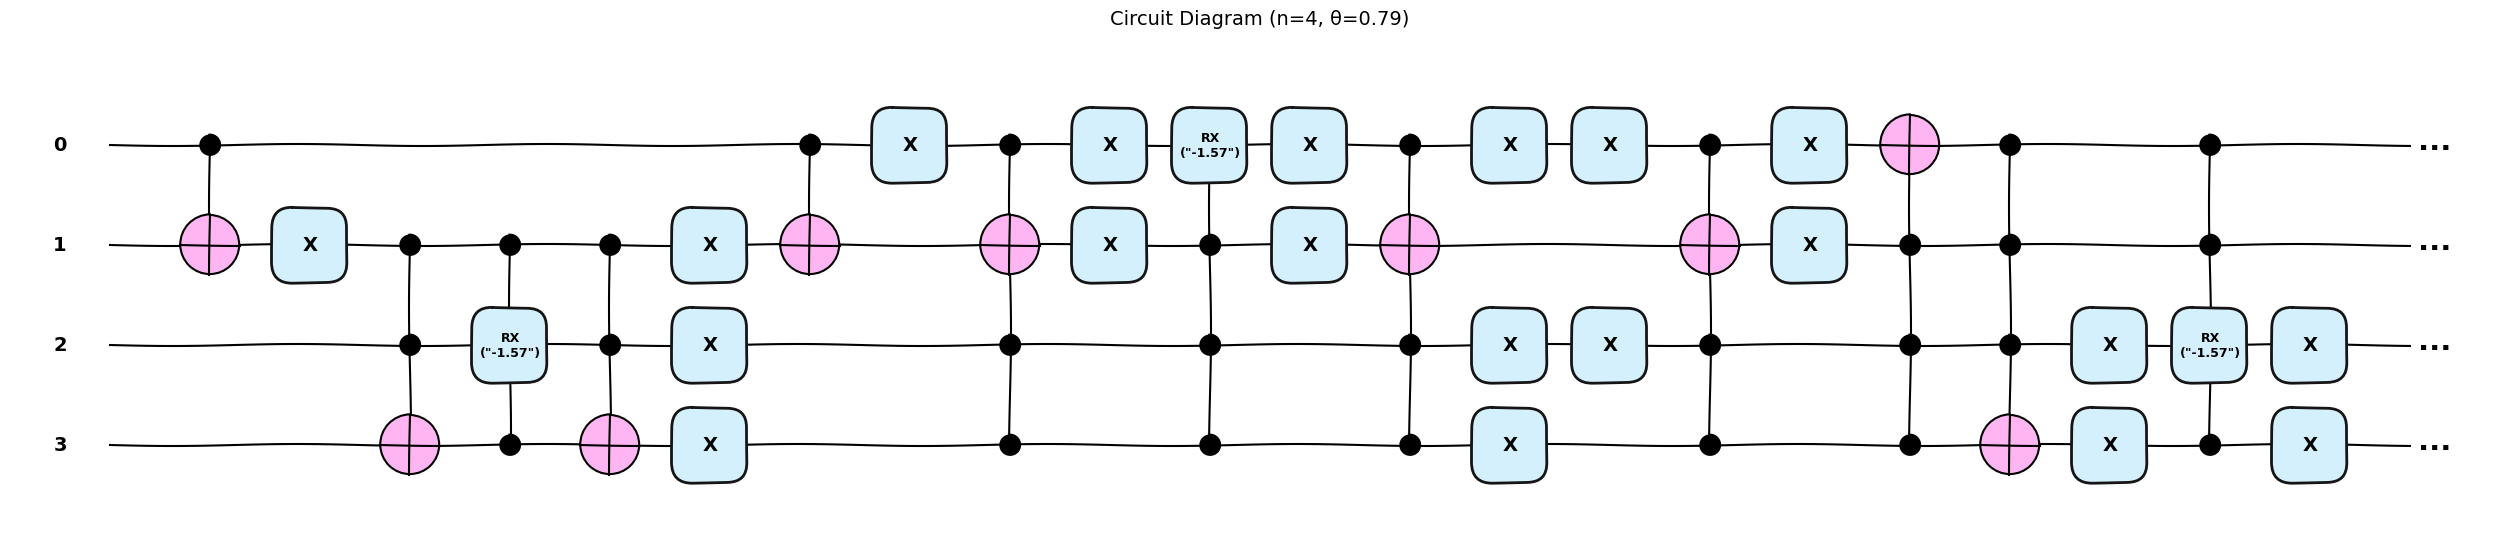

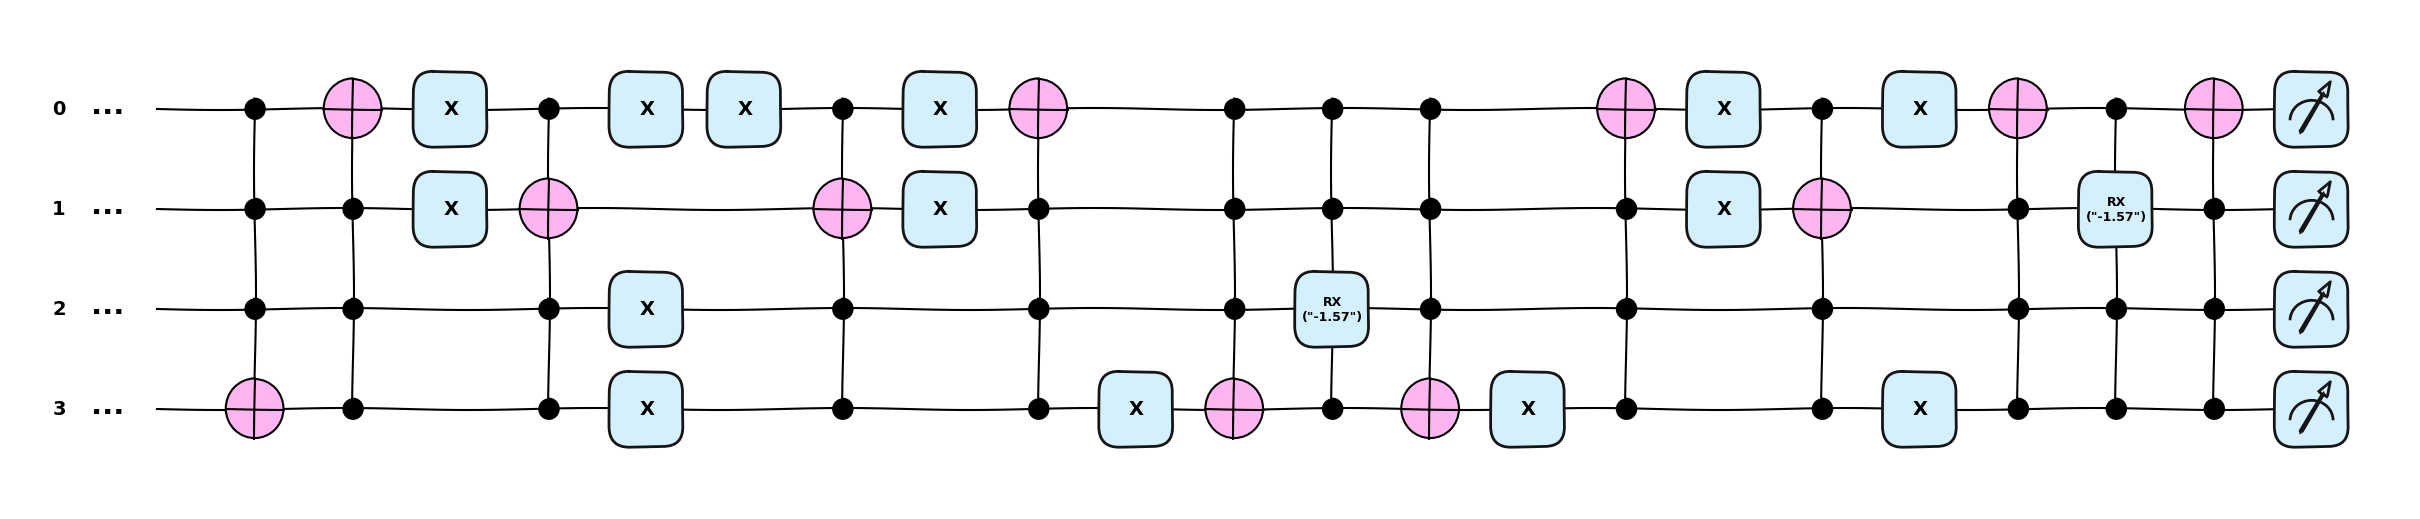

In [165]:

# 4-qubit block wrapper (from your code):
def e_SWAP_SWAP_circuit(theta):
    e_SWAP_SWAP_circuit_1(-2*theta)
    e_SWAP_SWAP_circuit_2(-2*theta)
    e_SWAP_SWAP_circuit_3(-2*theta)
    e_SWAP_SWAP_circuit_4(-2*theta)
    e_SWAP_SWAP_circuit_5(-2*theta)

fig4a = show_circuit(lambda th: e_SWAP_SWAP_circuit(th), n=4, theta=np.pi/4, max_length=22)

print("\n== 4-qubit action at θ=π ==")
print_action(lambda th: e_SWAP_SWAP_circuit(th), n=4, theta=np.pi/4)

SWAP12_SWAP34 = unitary_of(lambda th: e_SWAP_SWAP_circuit(th), n=4, theta=np.pi/4)
plot_complex_matrix_interactive(SWAP12_SWAP34, title="Unitary of e^{iθ SWAP_{12}⊗SWAP_{34}} at θ=π/4")


== 4-qubit action at θ=π/2 ==
State |0000> maps to:
  |0000> with amplitude (1+0j)
State |0001> maps to:
  |0010> with amplitude 1j
State |0010> maps to:
  |0001> with amplitude 1j
State |0011> maps to:
  |0011> with amplitude (1+0j)
State |0100> maps to:
  |1000> with amplitude 1j
State |0101> maps to:
  |1010> with amplitude 1j
State |0110> maps to:
  |1001> with amplitude 1j
State |0111> maps to:
  |1011> with amplitude 1j
State |1000> maps to:
  |0100> with amplitude 1j
State |1001> maps to:
  |0110> with amplitude 1j
State |1010> maps to:
  |0101> with amplitude 1j
State |1011> maps to:
  |0111> with amplitude 1j
State |1100> maps to:
  |1100> with amplitude (1+0j)
State |1101> maps to:
  |1110> with amplitude 1j
State |1110> maps to:
  |1101> with amplitude 1j
State |1111> maps to:
  |1111> with amplitude (1+0j)


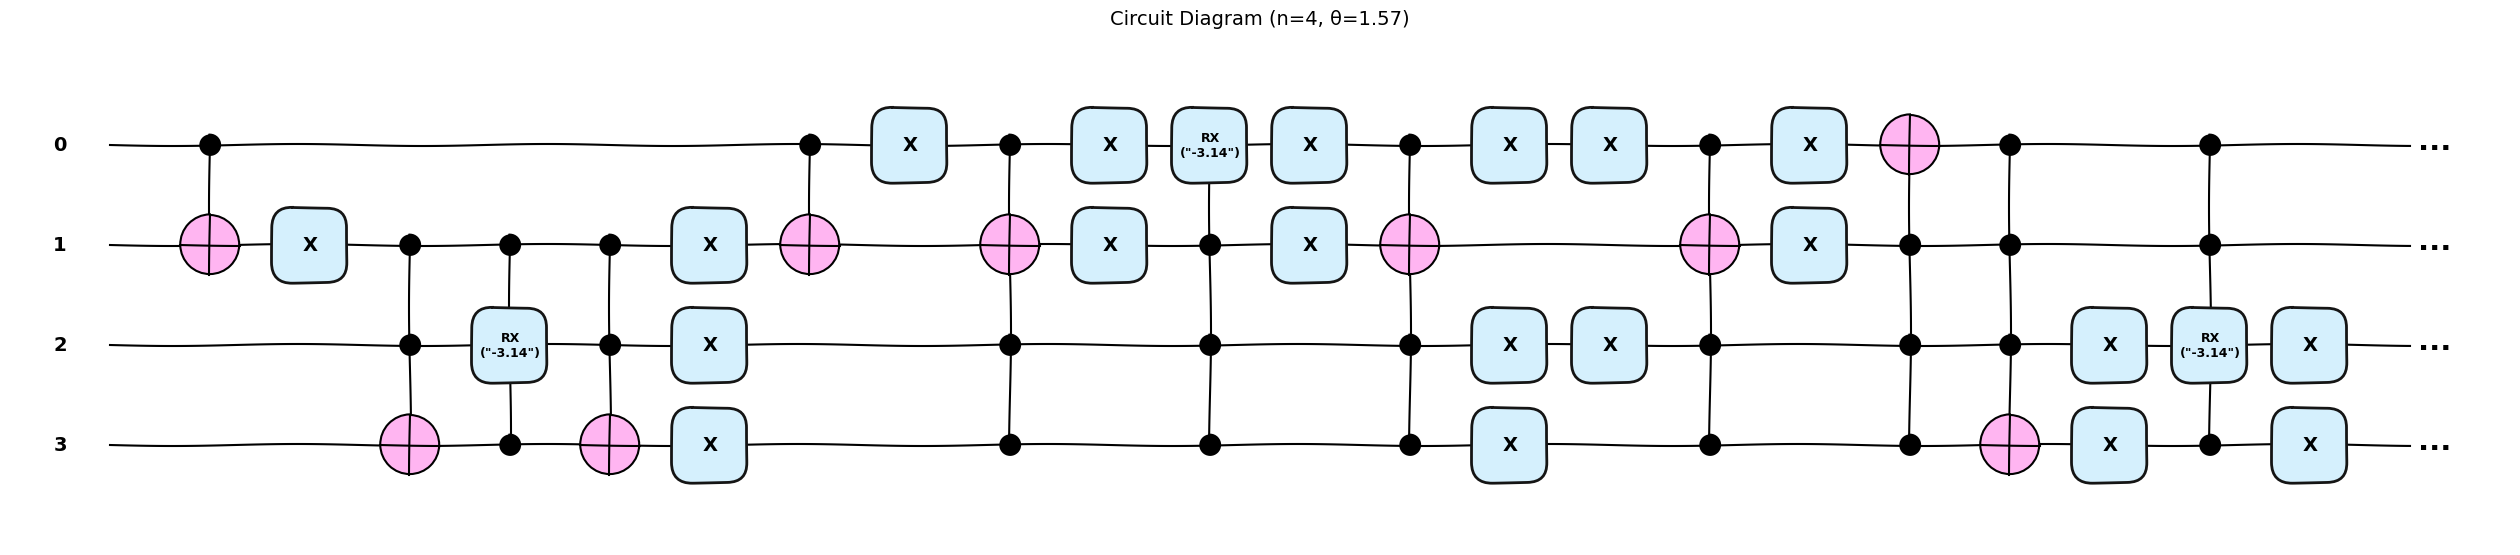

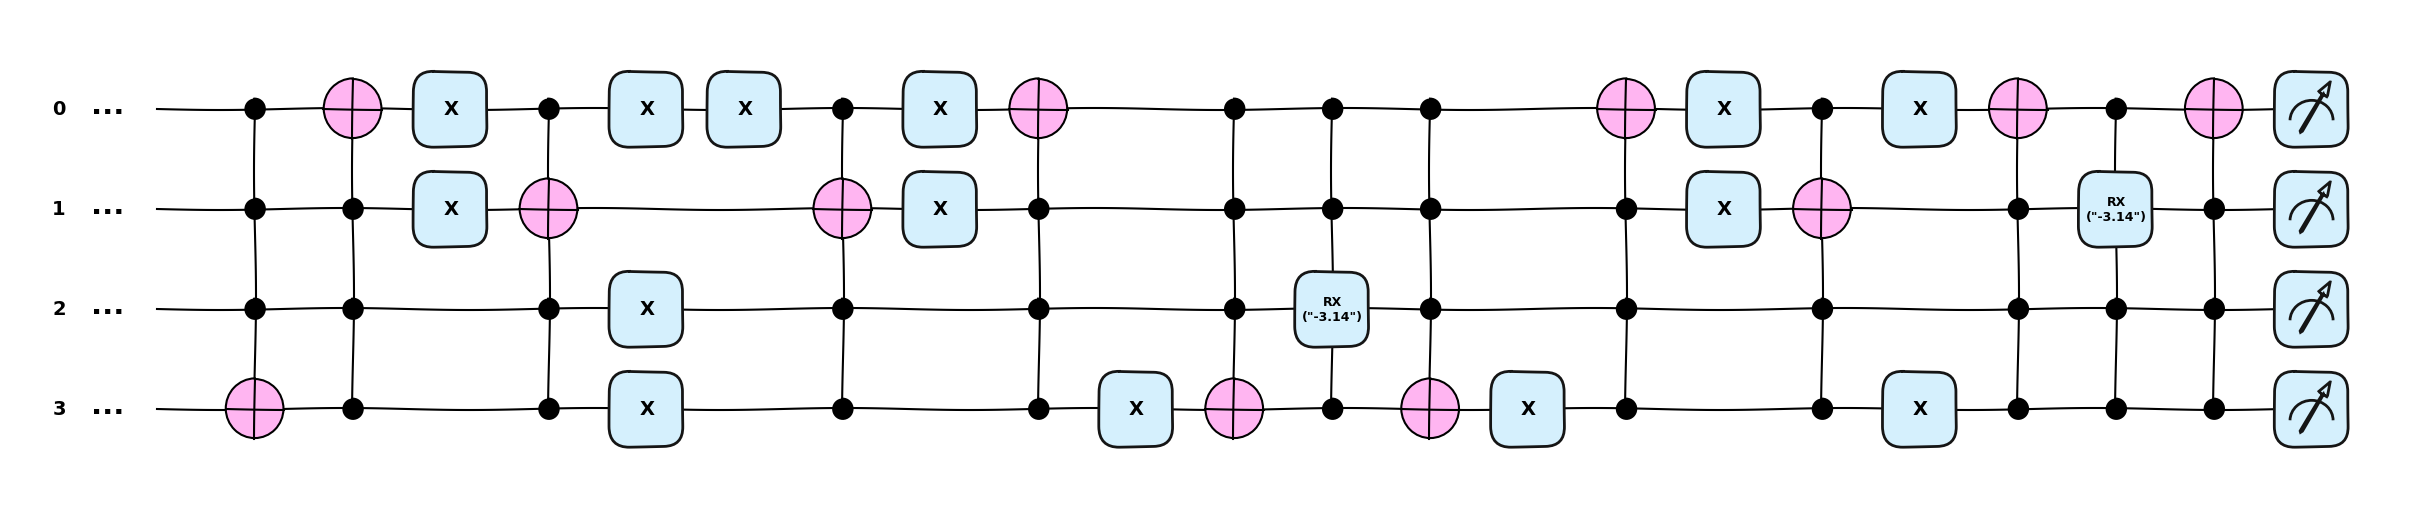

In [166]:
fig4b = show_circuit(lambda th: e_SWAP_SWAP_circuit(th), n=4, theta=np.pi/2, max_length=22)

print("\n== 4-qubit action at θ=π/2 ==")
print_action(lambda th: e_SWAP_SWAP_circuit(th), n=4, theta=np.pi/2)

SWAP12pSWAP34 = unitary_of(lambda th: e_SWAP_SWAP_circuit(th), n=4, theta=np.pi/2)
plot_complex_matrix_interactive(SWAP12pSWAP34, title="Unitary of e^{iθ SWAP_{12}⊗SWAP_{34}} at θ=π/2")

# Energy Conserving Unitaries

Implemented from `Bai, G. Marvian, I. Synthesis of Energy-Conserving Quantum Circuits with XY interaction` (https://arxiv.org/pdf/2309.11051)[https://arxiv.org/pdf/2309.11051]

[(<Figure size 1900x400 with 1 Axes>,
  <Axes: title={'center': 'U(θ, b=0) on wires (0,1,2)'}>)]

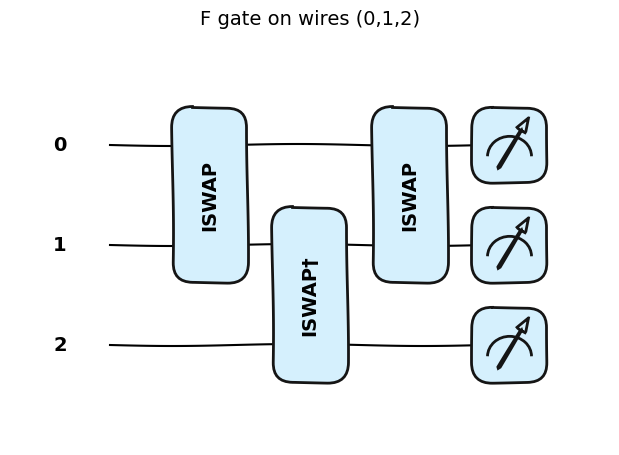

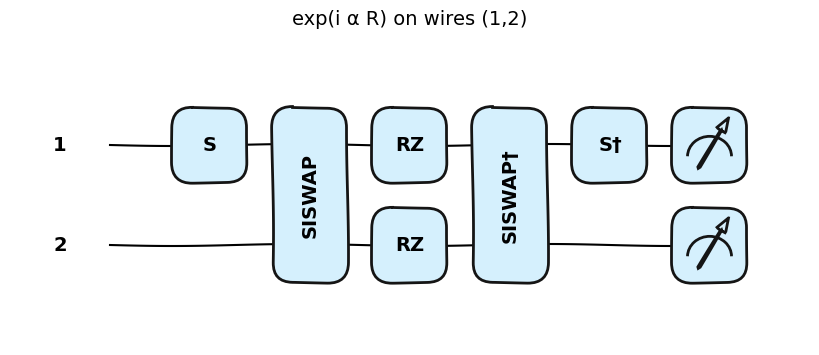

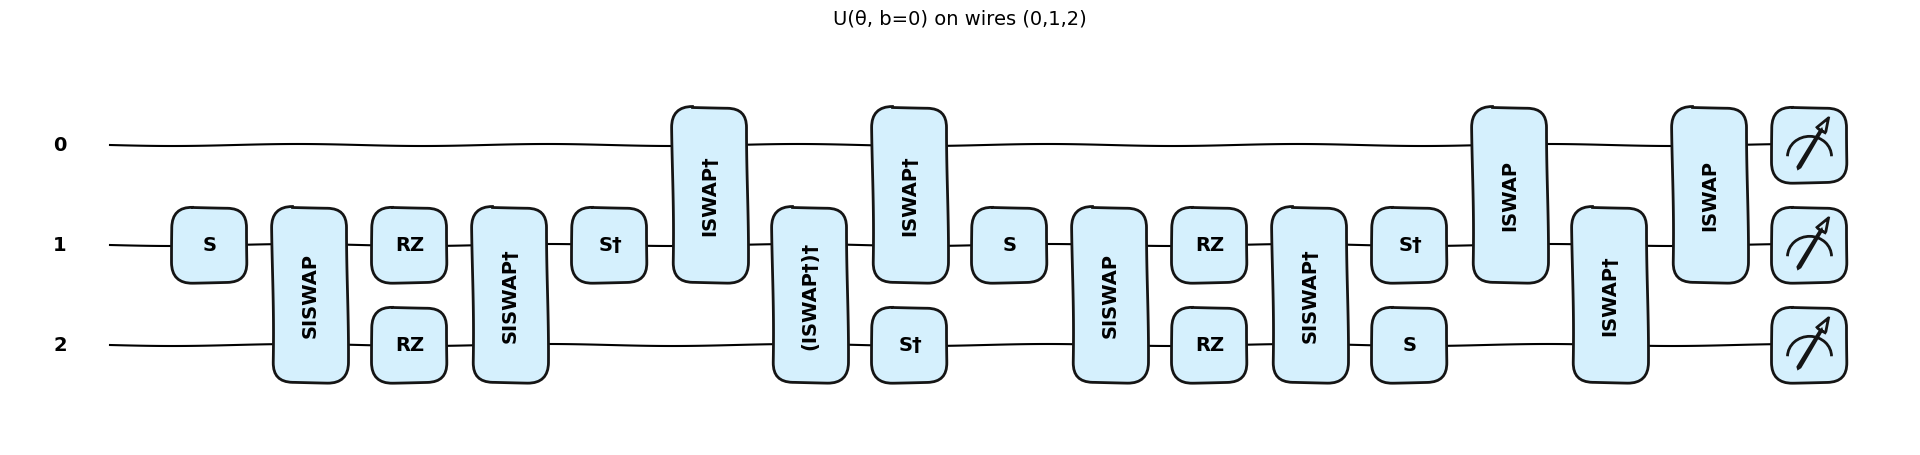

In [53]:
# --- F gate on three wires: iSWAP(0,1) • iSWAP†(1,2) • iSWAP(0,1)
def F(wires=(0,1,2)):
    a, b, c = 0, 1, 2
    qml.ISWAP(wires=[a, b])
    qml.adjoint(qml.ISWAP)(wires=[b, c])
    qml.ISWAP(wires=[a, b])

# --- e^{i α R} on a pair of wires with R=(XX+YY)/2
# Diagram:  S —— √iSWAP —— [e^{-i α Z/2}, e^{+i α Z/2}] —— (√iSWAP)† —— S†
# Recall: RZ(φ) implements e^{-i φ Z/2}, so:
#   upper wire:  RZ(α)  == e^{-i α Z/2}
#   lower wire:  RZ(-α) == e^{+i α Z/2}
def exp_i_alpha_R(alpha, wires):
    a, b = wires
    qml.S(wires=a)
    qml.SISWAP(wires=[a, b])                     # √iSWAP
    qml.RZ(alpha, wires=a)                        # e^{-i α Z/2} on upper
    qml.RZ(-alpha, wires=b)                       # e^{+i α Z/2} on lower
    qml.adjoint(qml.SISWAP)(wires=[a, b])         # (√iSWAP)†
    qml.adjoint(qml.S)(wires=a)

# --- Full 3-qubit unitary:
# U = exp(i θ/2 R_23) · F†_123 · S†_3 · exp(i (-1)^b θ/2 R_23) · S_3 · F_123
# Using zero-based wires: qubits (0,1,2); R_23 acts on wires (1,2)
def U_theta_b(theta, b, wires=(0,1,2)):
    q1, q2, q3 = wires
    alpha = theta / 2.0

    exp_i_alpha_R(alpha, wires=(q2, q3))          # e^{i θ/2 R_23}
    qml.adjoint(F)(wires=wires)                   # F†
    qml.adjoint(qml.S)(wires=q3)                  # S† on qubit 3
    exp_i_alpha_R(((-1)**b) * alpha, wires=(q2, q3))  # e^{i (-1)^b θ/2 R_23}
    qml.S(wires=q3)                                # S on qubit 3
    F(wires=wires)                                 # F


def circuit(theta, b):
    U_theta_b(theta, b, wires=(0,1,2))

# show circuit for θ=π/4, b=0
# fig = show_circuit(lambda th: circuit(th, b=0), n=3, theta=np.pi/4)

show_circuit(F, n=3,theta=None, title="F gate on wires (0,1,2)")
show_circuit(lambda th: exp_i_alpha_R(th, wires=(1,2)), n=3, theta=np.pi/4, title="exp(i α R) on wires (1,2)")
show_circuit(lambda th: U_theta_b(th, b=0, wires=(0,1,2)), n=3, theta=np.pi/4, max_length=17, title="U(θ, b=0) on wires (0,1,2)")


In [167]:
from pennylane.operation import Operation

import pennylane as qml
from pennylane.operation import Operation
import numpy as np

# ---------- e^{i α R} with R=(XX+YY)/2 as a custom gate ----------
class Exp_iR(Operation):
    num_wires = 2
    num_params = 1
    grad_method = "A"

    def __init__(self, alpha, wires):
        super().__init__(alpha, wires=wires)

    def label(self, decimals=None, base_label=None, cache=None):
        a = self.parameters[0]
        if decimals is None:
            return r"exp(i·αR)"
        return rf"exp(i·{a:.{decimals}f}·R)"

    @staticmethod
    def compute_decomposition(alpha, wires):
        # matches your √iSW, S, and Z-rotation box decomposition
        a, b = wires
        return [
            qml.S(a),
            qml.SISWAP(wires=[a, b]),          # √iSWAP
            qml.RZ(alpha, wires=a),            # e^{-i α Z/2}
            qml.RZ(-alpha, wires=b),           # e^{+i α Z/2}
            qml.adjoint(qml.SISWAP)(wires=[a, b]),
            qml.adjoint(qml.S)(wires=a),
        ]

# ---------- F gate (three-qubit) as a custom gate ----------
class FGate(Operation):
    num_wires = 3
    num_params = 0
    grad_method = None

    def __init__(self, wires):
        super().__init__(wires=wires)

    def label(self, decimals=None, base_label=None):
        return "F"

    @staticmethod
    def compute_decomposition(wires):
        a, b, c = wires
        return [
            qml.ISWAP(wires=[a, b]),
            qml.adjoint(qml.ISWAP)(wires=[b, c]),
            qml.ISWAP(wires=[a, b]),
        ]

# ---------- Full U(θ, b) as a single custom gate ----------
class UThetaB(Operation):
    """
    U(θ,b) = e^{i(θ/2) R_23} · F† · S_3† · e^{i((-1)^b θ/2) R_23} · S_3 · F
    Uses wires (q1,q2,q3) = (0,1,2) by default.
    """
    num_wires = 3
    num_params = 2
    grad_method = "A"

    def __init__(self, theta, b, wires):
        super().__init__(theta, b, wires=wires)

    def label(self, decimals=None, base_label=None):
        theta, b = self.parameters
        if decimals is None:
            return r"U(θ,b)"
        return rf"U(θ={theta:.{decimals}f}, b={int(b)})"

    @staticmethod
    def compute_decomposition(theta, b, wires):
        q1, q2, q3 = wires
        alpha1 = theta/2.0
        alpha2 = ((-1)**int(b)) * theta/2.0
        return [
            Exp_iR(alpha1, wires=[q2, q3]),
            qml.adjoint(FGate)(wires=wires),
            qml.adjoint(qml.S)(wires=q3),
            Exp_iR(alpha2, wires=[q2, q3]),
            qml.S(wires=q3),
            FGate(wires=wires),
        ]

# figUb = show_circuit(lambda th: UThetaB(th, b=0, wires=(0,1,2)), n=3, theta=np.pi/4)
# figF = show_circuit(lambda th: FGate(wires=(0,1,2)), n=3, theta=0)
# figExpR = show_circuit(lambda th: Exp_iR(th, wires=(1,2)), n=3, theta=np.pi/4)

## Implementing $exp^{i \theta SWAP_{12}}$ using $\sqrt{iSWAP}$ and $R_z(\theta)$


== 2-qubit e^{i θ SWAP} action at θ=π/2 ==
State |00> maps to:
  |00> with amplitude (1+2.1634997285925725e-17j)
State |01> maps to:
  |10> with amplitude (-1.1998069540076136e-16+0.9999999999999998j)
State |10> maps to:
  |01> with amplitude (1.1998069540076136e-16+0.9999999999999998j)
State |11> maps to:
  |11> with amplitude (1-2.1634997285925725e-17j)


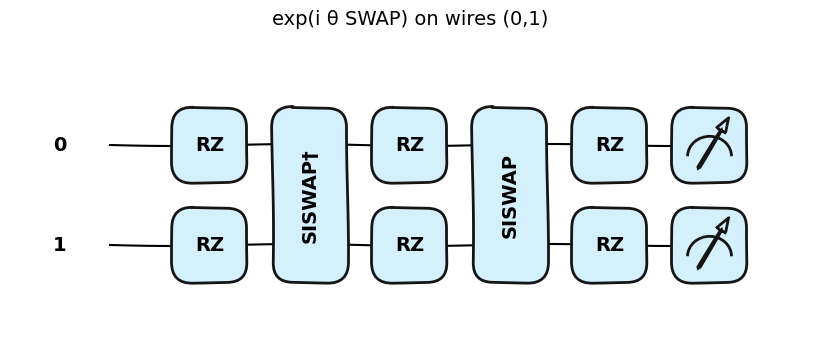

In [168]:
def exp_i_theta_SWAP(theta, wires):
    a, b = wires
    qml.RZ(-np.pi/4, wires=a)
    qml.RZ(np.pi/4, wires=b)

    qml.adjoint(qml.SISWAP)(wires=[a, b])

    qml.RZ(theta, wires=a)
    qml.RZ(-theta, wires=b)

    qml.SISWAP(wires=[a, b])

    qml.RZ(np.pi/4, wires=a)
    qml.RZ(-np.pi/4, wires=b)

theta = np.pi/2
print("\n== 2-qubit e^{i θ SWAP} action at θ=π/2 ==")
print_action(lambda th: exp_i_theta_SWAP(th, wires=(0,1)), n=2, theta=theta)
# show circuit for e^{i θ SWAP} on wires (0,1)
show_circuit(lambda th: exp_i_theta_SWAP(th, wires=(0,1)), n=2, theta=np.pi/2, title="exp(i θ SWAP) on wires (0,1)")
plot_complex_matrix_interactive(unitary_of(lambda th: exp_i_theta_SWAP(th, wires=(0,1)), n=2, theta=theta), title="Unitary of exp(i θ SWAP) at θ=π/2")

## Implementing $e^{i \theta SWAP_{12} \otimes SWAP_{34}}$ using $\sqrt{iSWAP}$ and $R_z(\theta)$


== 4-qubit exp^{i θ SWAP_{12}⊗SWAP_{34}} action at θ=π/2 ==
State |0000> maps to:
  |0000> with amplitude (1+0j)
State |0001> maps to:
  |0010> with amplitude 0.9999999999999998j
State |0010> maps to:
  |0001> with amplitude 0.9999999999999998j
State |0011> maps to:
  |0011> with amplitude (1+0j)
State |0100> maps to:
  |1000> with amplitude -0.9999999999999998j
State |0101> maps to:
  |1010> with amplitude (-0.9999999999999998+0j)
State |0110> maps to:
  |1001> with amplitude (-0.9999999999999998+0j)
State |0111> maps to:
  |1011> with amplitude 0.9999999999999998j
State |1000> maps to:
  |0100> with amplitude -0.9999999999999998j
State |1001> maps to:
  |0110> with amplitude (-0.9999999999999998+0j)
State |1010> maps to:
  |0101> with amplitude (-0.9999999999999998+0j)
State |1011> maps to:
  |0111> with amplitude 0.9999999999999998j
State |1100> maps to:
  |1100> with amplitude (1+0j)
State |1101> maps to:
  |1110> with amplitude 0.9999999999999998j
State |1110> maps to:
  |1101> w

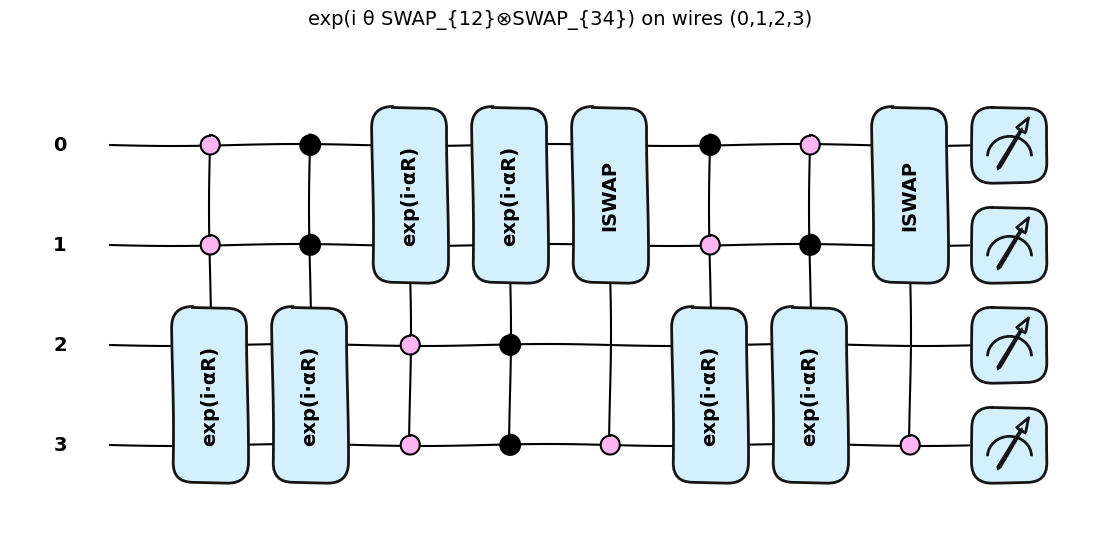

In [170]:
def exp_i_theta_SWAP12_SWAP34(theta):
    qml.ctrl(Exp_iR, control=[0,1], control_values=[0,0])(theta, wires=[2,3])
    qml.ctrl(Exp_iR, control=[0,1], control_values=[1,1])(theta, wires=[2,3])
    qml.ctrl(Exp_iR, control=[2,3], control_values=[0,0])(theta, wires=[0,1])
    qml.ctrl(Exp_iR, control=[2,3], control_values=[1,1])(theta, wires=[0,1])

    # qml.ctrl(Exp_iR, control=[0,1], control_values=[0,0])(theta, wires=[2,3])
    # qml.ctrl(Exp_iR, control=[0,1], control_values=[1,1])(theta, wires=[2,3])
    # qml.ctrl(Exp_iR, control=[2,3], control_values=[0,0])(theta, wires=[0,1])
    # qml.ctrl(Exp_iR, control=[2,3], control_values=[1,1])(theta, wires=[0,1])

    qml.ctrl(qml.ISWAP, control=[3], control_values=[0])(wires=[0,1])    
    qml.ctrl(Exp_iR, control=[0,1], control_values=[1,0])(theta, wires=[2,3])
    qml.ctrl(Exp_iR, control=[0,1], control_values=[0,1])(theta, wires=[2,3])
    qml.ctrl(qml.ISWAP, control=[3], control_values=[0])(wires=[0,1])    
    
    # qml.SWAP(wires=[0,1])
    # qml.ctrl(Exp_iR, control=[0,1], control_values=[1,0])(theta, wires=[3,2])
    # qml.SWAP(wires=[0,1])
    # qml.SWAP(wires=[0,1])
    # qml.ctrl(Exp_iR, control=[0,1], control_values=[1,0])(theta, wires=[2,3])
    # qml.SWAP(wires=[0,1])

show_circuit(lambda th: exp_i_theta_SWAP12_SWAP34(th), n=4, theta=np.pi/2, max_length=15, title="exp(i θ SWAP_{12}⊗SWAP_{34}) on wires (0,1,2,3)")
print("\n== 4-qubit exp^{i θ SWAP_{12}⊗SWAP_{34}} action at θ=π/2 ==")
print_action(lambda th: exp_i_theta_SWAP12_SWAP34(th), n=4, theta=np.pi/2)
plot_complex_matrix_interactive(unitary_of(lambda th: exp_i_theta_SWAP12_SWAP34(th), n=4, theta=np.pi/2), title="Unitary of exp(i θ SWAP_{12}⊗SWAP_{34}}) at θ=π/2")


== 4-qubit exp^{i θ SWAP_{12}⊗SWAP_{34}} action at θ=π/4 ==
State |0000> maps to:
  |0000> with amplitude (1+0j)
State |0001> maps to:
  |0001> with amplitude (0.7071067811865474+0j)
  |0010> with amplitude 0.7071067811865474j
State |0010> maps to:
  |0001> with amplitude 0.7071067811865474j
  |0010> with amplitude (0.7071067811865474+0j)
State |0011> maps to:
  |0011> with amplitude (1+0j)
State |0100> maps to:
  |0100> with amplitude (-0.7071067811865474+0j)
  |1000> with amplitude -0.7071067811865474j
State |0101> maps to:
  |0101> with amplitude (0.7071067811865474+0j)
  |1010> with amplitude (-0.7071067811865474+0j)
State |0110> maps to:
  |0110> with amplitude (-0.7071067811865474+0j)
  |1001> with amplitude (-0.7071067811865474+0j)
State |0111> maps to:
  |0111> with amplitude (0.7071067811865474+0j)
  |1011> with amplitude 0.7071067811865474j
State |1000> maps to:
  |0100> with amplitude -0.7071067811865474j
  |1000> with amplitude (-0.7071067811865474+0j)
State |1001> maps to

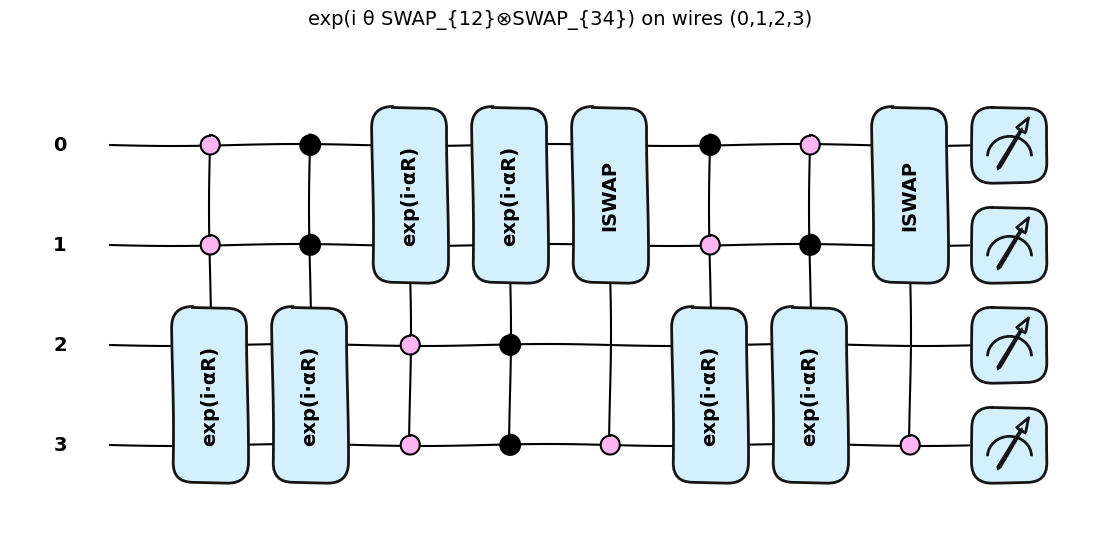

In [171]:

show_circuit(lambda th: exp_i_theta_SWAP12_SWAP34(th), n=4, theta=np.pi/4, max_length=15, title="exp(i θ SWAP_{12}⊗SWAP_{34}) on wires (0,1,2,3)")
print("\n== 4-qubit exp^{i θ SWAP_{12}⊗SWAP_{34}} action at θ=π/4 ==")
print_action(lambda th: exp_i_theta_SWAP12_SWAP34(th), n=4, theta=np.pi/4)
plot_complex_matrix_interactive(unitary_of(lambda th: exp_i_theta_SWAP12_SWAP34(th), n=4, theta=np.pi/4), title="Unitary of exp(i θ SWAP_{12}⊗SWAP_{34}}) at θ=π/4")